In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
df = pd.read_csv('data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


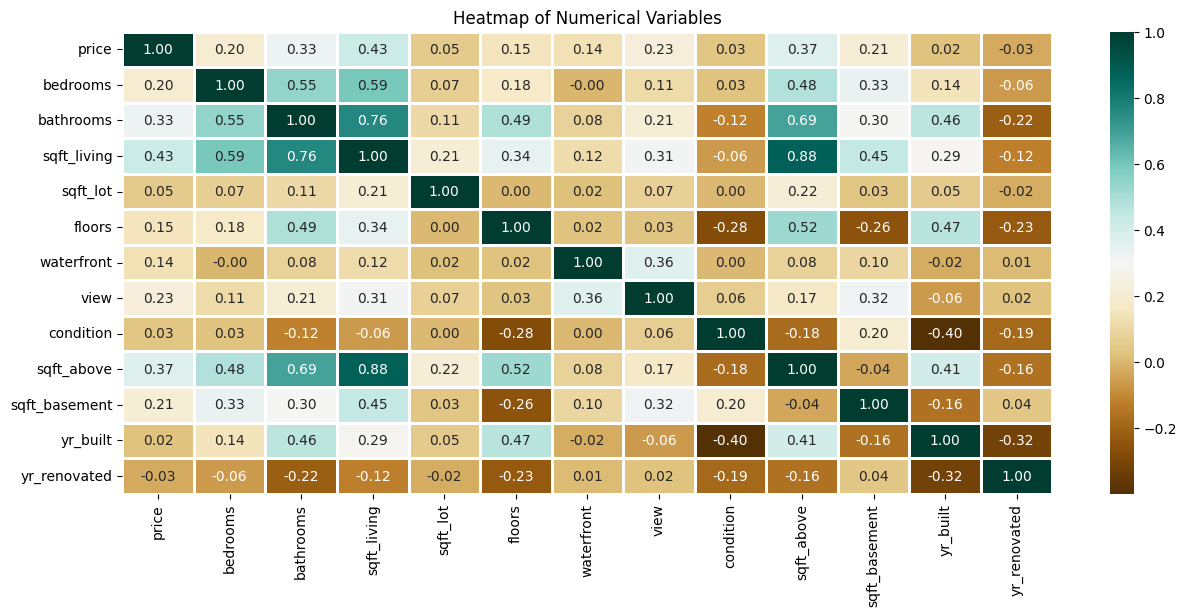

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
numberical_dataset = df.select_dtypes(include='number')

plt.figure(figsize=(15,6))
sns.heatmap(numberical_dataset.corr(), annot=True, cmap='BrBG',linewidths=2,fmt='.2f')
plt.title('Heatmap of Numerical Variables')
plt.show()

In [34]:
x = df.drop(['price', 'date', 'street'], axis=1)
# If you have other string columns, add them to the list above
x = x.select_dtypes(include=[np.number])  # Keep only numeric columns
x = x.to_numpy()

In [35]:
y = df['price'].to_numpy()
y.shape


(4600,)

In [36]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.02,random_state=52)
 

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x, y)
ycap = model.predict(x)
acc = r2_score(y, ycap)
print("linear regression accuracy: ", acc)

linear regression accuracy:  0.21779971300787349


In [45]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x,y)
ycap = model.predict(x)
acc = r2_score(y,ycap)
print(acc*100)

99.99980786607662


In [56]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10)
model.fit(x,y)
ycap = model.predict(x)
acc = r2_score(y,ycap)
acc

0.8900849993715041

In [43]:
pre = np.c_[y,ycap]
pre

array([[ 313000.      ,  313000.      ],
       [2384000.      , 2384000.      ],
       [ 342000.      ,  342000.      ],
       ...,
       [ 416904.166667,  416904.166667],
       [ 203400.      ,  203400.      ],
       [ 220600.      ,  220600.      ]], shape=(4600, 2))